In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("stock_prices.csv")
def first14(df, index, column):
    result = 0
    for i in range(index-13, index+1):
        result += df.loc[i, column]
    return(result)

def next14(df, index, column):
    return(df.loc[index-1, column+'14'] - (df.loc[index-1, column+'14']/14) + df.loc[index, column])

def get_basix(high, low, close, lookback):
    plus_dm = high.diff()
    minus_dm = -low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm < 0] = 0
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    return plus_dm,minus_dm,tr

data['+DM'] = pd.DataFrame(get_basix(data['High'], data['Low'], data['Close'], 14)[0]).rename(columns = {0:'plus_dm'})
data['-DM'] = pd.DataFrame(get_basix(data['High'], data['Low'], data['Close'], 14)[1]).rename(columns = {0:'minus_dm'})
data['TR'] = pd.DataFrame(get_basix(data['High'], data['Low'], data['Close'], 14)[2]).rename(columns = {0:'tr'})
data['TR14']=0
data['+DM14']=0
data['-DM14']=0


def first14adx(df, index):
    result = 0
    for i in range(index-13, index+1):
        result += df.loc[i, 'DX']
    return(result/14)

def nextadx(df, index):
    return(round(((df.loc[index-1, 'ADX']*13) + df.loc[index, 'DX'])/14, 2))

for i in range(1, len(data)):
    if data.TR.count() == 14: #since lookback=14
        data.loc[i, 'TR14'] = first14(data, i, 'TR')
        data.loc[i, '+DM14'] = first14(data, i, '+DM')
        data.loc[i, '-DM14'] = first14(data, i, '-DM')
    elif data.TR.count() >= 14:
        data.loc[i, 'TR14'] = next14(data, i, 'TR')
        data.loc[i, '+DM14'] = next14(data, i, '+DM')
        data.loc[i, '-DM14'] = next14(data, i, '-DM')
    if 'TR14' in data.columns:
        data.loc[i, '+DI'] = round((data.loc[i, '+DM14'] / data.loc[i, 'TR14'])*100,3)
        data.loc[i, '-DI'] = round((data.loc[i, '-DM14'] / data.loc[i, 'TR14'])*100,3)  
        data.loc[i, 'DX'] = round((abs(data.loc[i, '+DI'] - data.loc[i, '-DI'])/abs(data.loc[i, '+DI'] + data.loc[i, '-DI']))*100,3) 

    if 'DX' in data.columns:
        if data.DX.count() == 14:
            data.loc[i, 'ADX'] = first14adx(data, i)
        
        elif data.DX.count() >= 14:
            data.loc[i, 'ADX'] = nextadx(data, i)
del data['TR14'],data['+DM14'],data['-DM14'],data['DX']
data = data.dropna()
data

C:\Users\siddh\AppData\Local\Temp\ipykernel_26040\1372906411.py:56: RuntimeWarning: invalid value encountered in double_scalars
  data.loc[i, 'DX'] = round((abs(data.loc[i, '+DI'] - data.loc[i, '-DI'])/abs(data.loc[i, '+DI'] + data.loc[i, '-DI']))*100,3)


,Date,Open,High,Low,Close,Adj Close,Volume,+DM,-DM,TR,+DI,-DI,ADX
15,2020-01-24,80.062500,80.832497,79.379997,79.577499,78.198082,146537600,0.942497,0.000000,1.452499,34.679,10.445,55.106357
16,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898643,161940000,0.000000,3.159996,3.357498,26.369,30.494,51.690000
17,2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045761,162234000,1.657501,0.000000,2.362495,33.098,25.808,48.880000
18,2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679443,216229200,2.362503,0.000000,2.540001,42.148,21.910,47.650000
19,2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563988,126743200,0.000000,0.657501,1.397499,38.686,23.975,45.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802322,54930100,1.030014,0.000000,2.500000,35.919,17.670,21.780000
249,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200,3.879990,0.000000,5.369995,40.127,15.624,23.360000
250,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676682,121047300,1.449997,0.000000,4.449997,39.420,14.160,25.060000
251,2020-12-30,135.580002,135.990005,133.399994,133.720001,132.536850,96452100,0.000000,0.940002,2.590012,37.234,15.388,26.240000


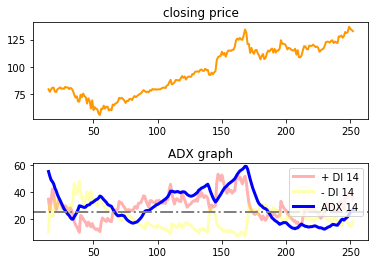

In [12]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (7,0), rowspan = 5, colspan = 1)
ax1.plot(data['Close'], linewidth = 2, color = '#ff9800')
ax1.set_title('closing price')
ax2.plot(data['+DI'], color = 'red', label = '+ DI 14', linewidth = 3, alpha = 0.3)
ax2.plot(data['-DI'], color = 'yellow', label = '- DI 14', linewidth = 3, alpha = 0.3)
ax2.plot(data['ADX'], color = 'blue', label = 'ADX 14', linewidth = 3)
ax2.axhline(25, color = 'grey', linewidth = 2, linestyle = '-.')
ax2.legend()
ax2.set_title('ADX graph')
plt.show()